Q1 PART (a) and (b)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

S = 38
K = 35
T = 4 / 12
r = 0.06
call_market_price = 4.20  # Observed call price

# Black-Scholes formula for European Call
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

# Trial and error
trial_sigmas = [0.1, 0.3, 0.5]
trial_call_prices = [bs_call_price(S, K, T, r, sigma) for sigma in trial_sigmas]

# Implied volatility using Brent's method
def objective_function(sigma):
    return bs_call_price(S, K, T, r, sigma) - call_market_price

implied_vol = brentq(objective_function, 0.01, 1.0)

sigma_used = 0.28

def bs_put_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put

put_price = bs_put_price(S, K, T, r, sigma_used)
df = pd.DataFrame({
    'Trial Sigma': trial_sigmas,
    'Trial Call Price': trial_call_prices
})
print(df)
print(f'Implied Volatility = {implied_vol}')
print(f'Put Price={put_price}')


   Trial Sigma  Trial Call Price
0          0.1          3.725052
1          0.3          4.762524
2          0.5          6.251189
Implied Volatility = 0.21345251542770804
Put Price=0.931950139881403


Part (c) Yes, the firm should launch the product.
Real options perspective

* Underlying asset (S):* Expected revenue = \$38M
* Strike price (K): Launch cost = \$35M
* S > K → the option is in-the-money

Since the revenue exceeds the cost, the option is in-the-money, meaning the firm would realize an immediate gain by launching. Given the option cannot be exercised before expiry (European style) and there are no interim cash flows or strategic benefits from waiting, the value of delay is minimal. Launching now captures the upside while limiting downside risk, making it the optimal choice.


Q2 Part B c)

In [ ]:
import numpy as np
from scipy.stats import lognorm
from scipy.integrate import quad

S0 = 100
K = 105
sigma_daily = np.sqrt(np.pi / 2)
sigma_T = sigma_daily * np.sqrt(10)

mu = 0
scale = S0
def integrand(S):
    return (S - K) * lognorm.pdf(S, s=sigma_T, scale=scale)

# Numerical integration
expected_payoff, _ = quad(integrand, K, np.inf)
print(f"Expected payoff (fair value of the option): {expected_payoff:.4f}")


Expected payoff (fair value of the option): 18.0218


/tmp/ipython-input-7-829371241.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  expected_payoff, _ = quad(integrand, K, np.inf)


| Model        | Daily Movement             | Shape of $S_T$ distribution                                     | Notes                                |
| ------------ | -------------------------- | --------------------------------------------------------------- | ------------------------------------ |
| Binomial| +1 or -1                   | Discrete (11 values)                                            | Symmetric, low variance              |
| Normal   | $\mathcal{N}(0, \sigma^2)$ | Continuous, bell-shaped                                         | Gaussian, supports large deviations  |
| Uniform | $\mathcal{U}[-2, 2]$       | Sums of uniform → approx. *triangular* → normal (via CLT) | Slightly heavier tails than binomial |

Part C c)

In [ ]:
import numpy as np

S0 = 100
K = 105
T = 10
n_simulations = 100000

daily_moves = np.random.uniform(-2, 2, size=(n_simulations, T))
ST = S0 + np.sum(daily_moves, axis=1)

payoffs = np.maximum(ST - K, 0)

fair_value = np.mean(payoffs)
print(f"Estimated fair value under uniform model: {fair_value:.4f}")


Estimated fair value under uniform model: 0.1414


Q3

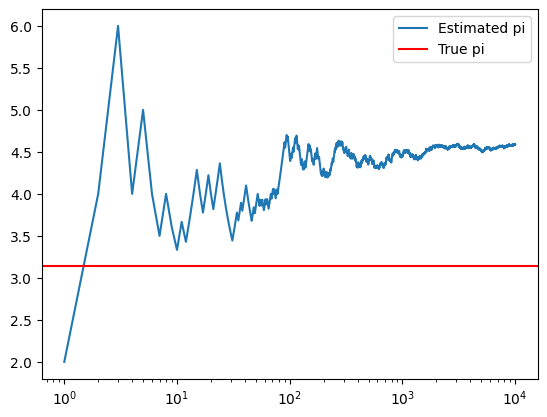

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
d = 1.0
l = 0.7

x = np.random.uniform(0, d/2, N)
theta = np.random.uniform(0, np.pi/2, N)
crossings = (l / 2) * np.sin(theta) >= x
cum_crossings = np.cumsum(crossings)
valid_trials = np.arange(1, N + 1)
pi_estimates = 2 * valid_trials / (d * cum_crossings)
pi_estimates[~np.isfinite(pi_estimates)] = 0
plt.plot(valid_trials, pi_estimates, label='Estimated pi')
plt.axhline(y=np.pi, color='r', label='True pi')
plt.xscale('log')
plt.legend()
plt.show()
